In [103]:
import pandas as pd

df = pd.read_csv('/Users/keerthana/Documents/NUS Precision Med 25/5005/5005_Project/Processed Datasets/AML.csv')
df.head()

,ID_REF,SUBTYPES,DDR1,RFC2,RFC2.1,HSPA6,PAX8,GUCA1A,GUCA1A.1,MIR5193,...,ZNF124,NFIC,GLYAT,ZNF141,CH25H,H6PD.2,H6PD.3,SIRPB1.2,SIRPB1.3,PCDH8
0,GSM1682614,1,492.5000,988.500,1522.300,1677.0000,2856.200,197.50000,236.20000,3948.200,...,3003.800,489.8000,379.60000,945.8000,102.70000,60.7000,95.00000,2096.0000,1124.5000,91.40000
1,GSM1682615,1,992.2914,1671.248,1205.765,312.9964,1514.233,68.79980,179.45170,6455.948,...,4108.014,1030.2210,109.02470,767.2295,11.72884,274.0456,173.57690,126.5837,169.2777,5.28214
2,GSM1682616,2,639.9207,2475.515,2045.759,369.9277,2167.405,93.66864,199.04000,10215.440,...,5128.173,1402.8630,195.03890,331.0485,101.89820,615.4205,207.26920,728.1829,245.7526,46.15807
3,GSM1682617,1,1586.2420,1669.516,3182.640,395.1871,1687.894,137.29080,93.24465,4501.796,...,5427.443,807.0797,73.01001,926.1743,230.80090,327.4015,119.15180,595.7837,195.9008,13.60067
4,GSM1682618,5,673.6545,2246.731,2588.312,857.8096,1973.064,83.86870,343.66590,5533.674,...,2551.292,1081.4950,219.95090,371.7992,177.03040,150.9986,21.19365,4153.4330,1220.5080,192.27200


In [104]:
import numpy as np

# Statistical Analysis & Machine Learning Packages/Libraries 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE # <--- Recursive Feature Eliminator
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr # <--- Pearson Correlation
from sklearn.feature_selection import SelectKBest, chi2 # <--- Chi-Squared Test
from sklearn.feature_selection import SelectKBest, f_classif # <--- Analysis of Variance
from sklearn.ensemble import RandomForestClassifier # <--- Random Forest Regressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.svm import SVC # <--  Support Vector Machine
import xgboost as xgb # <--  XGBoost
from sklearn.metrics import mean_squared_error
import sklearn.neighbors # <--- k-Nearest Neighbors
from sklearn.feature_selection import mutual_info_classif
from sklearn.neural_network import MLPClassifier # <--- Multi-Layer Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint
import sklearn.ensemble # <--- Soft Voting Machine
from sklearn.metrics import confusion_matrix

# Data Visualization Packages/Libraries 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.tree import plot_tree

# Miscellaneous Packages/Libraries 
import warnings
# from biothings_client import get_client
from sklearn.exceptions import ConvergenceWarning

# Hardcoded Values
random_state = 42 # <--- Random State
test_size = 0.3 # <--- Test/Train Split

kfold = KFold(n_splits = 6, shuffle = True, random_state = random_state) # <--- KFold
warnings.filterwarnings("ignore", category = ConvergenceWarning) # <--- Supress Warnings

In [105]:
# Feature Selection 
y = df['SUBTYPES'] # <--- Target (Case/Control)
x = df.drop(['SUBTYPES', 'ID_REF'], axis = 1) # <--- Features (Genomic/Clinical)

# normalization
# log
x_log_transformed = np.log1p(x) 
x_log_train, x_log_test, y_log_train, y_log_test = train_test_split(x_log_transformed, y, test_size = test_size, random_state = random_state) # <-- Test/Train

#sqrt
x_sqrt_transformed = np.sqrt(x)
x_sqrt_train, x_sqrt_test, y_sqrt_train, y_sqrt_test = train_test_split(x_sqrt_transformed, y, test_size = test_size, random_state = random_state) # <-- Test/Train

In [106]:
x_log_train.head()

,DDR1,RFC2,RFC2.1,HSPA6,PAX8,GUCA1A,GUCA1A.1,MIR5193,MIR5193.1,THRA,...,ZNF124,NFIC,GLYAT,ZNF141,CH25H,H6PD.2,H6PD.3,SIRPB1.2,SIRPB1.3,PCDH8
171,5.885270,7.326466,7.434080,7.816175,7.832213,4.900820,5.440251,8.311325,8.100161,6.531461,...,7.532570,5.712412,6.107913,6.492694,3.555348,4.363099,5.364573,7.615545,7.696894,4.744932
154,7.031741,8.421915,8.644953,5.689684,8.101223,5.430222,4.390739,8.791881,8.472447,6.219994,...,7.863882,6.590026,6.180638,6.250361,5.901266,6.384182,4.483003,5.218191,4.487512,3.113515
85,6.736258,7.352867,7.478981,4.975172,7.478643,4.583598,3.880036,8.468423,8.211355,7.056516,...,8.392293,7.106834,5.431639,5.858231,3.034968,6.354296,5.762978,5.644532,5.593125,4.710718
166,5.939734,7.582221,7.737943,6.155347,7.821734,5.488134,5.603699,8.925217,8.882059,6.174747,...,8.297838,6.353253,5.294488,6.708565,3.111686,6.736622,3.006816,7.345228,6.680460,3.493993
26,6.776536,7.375414,7.573229,6.745337,7.409115,3.768956,5.814772,9.182097,8.916005,6.398042,...,8.513570,7.380291,5.401076,6.697005,2.684994,5.935080,3.559427,6.841960,6.081578,3.588368


In [107]:
x_sqrt_train.head()

,DDR1,RFC2,RFC2.1,HSPA6,PAX8,GUCA1A,GUCA1A.1,MIR5193,MIR5193.1,THRA,...,ZNF124,NFIC,GLYAT,ZNF141,CH25H,H6PD.2,H6PD.3,SIRPB1.2,SIRPB1.3,PCDH8
171,18.939377,38.974351,41.130281,49.793574,50.194621,11.549892,15.149257,63.786362,57.393379,26.180145,...,43.207638,17.366635,21.175457,25.676838,5.830952,8.803408,14.584238,45.038872,46.909487,10.677078
154,33.630343,67.413648,75.368428,17.169741,57.423863,15.073155,8.927486,81.114734,69.138990,22.398661,...,50.996078,26.959228,21.961330,22.742032,19.091883,24.318717,9.354143,13.549908,9.375500,4.636809
85,29.006937,39.492594,42.064653,11.990567,42.057556,9.842049,6.886652,69.000000,60.675613,34.049890,...,66.422323,34.918161,15.083885,18.684330,4.449755,23.957410,17.812771,16.785148,16.357677,10.494375
166,19.463656,44.294289,47.882669,21.684799,49.932214,15.517912,16.444713,86.707647,84.856361,21.896605,...,63.357573,23.944895,14.079616,28.607581,4.632372,29.012232,4.384394,39.341937,28.207896,5.649525
26,29.597730,39.940618,44.095487,29.139079,40.619749,6.506519,18.281551,98.592703,86.309119,24.488109,...,70.575619,40.038194,14.854114,28.442512,3.695688,19.418295,5.843205,30.583048,20.897828,5.930851


In [108]:
#box-cox
#from scipy.stats import boxcox

# Convert DataFrame to NumPy array
#xtrain_np = x.to_numpy()

# Initialize transformed array
#xtrain_boxcox = np.zeros_like(xtrain_np, dtype=np.float64)

# Loop through each column and perform Box-Cox transformation
#for i in range(xtrain_np.shape[1]):
    #xtrain_boxcox[:, i], _ = boxcox(xtrain_np[:, i] + 1)  # Adding 1 to avoid non-positive values

# Convert transformed array back to DataFrame
#xtrain_boxcox_df = pd.DataFrame(xtrain_boxcox, columns=x.columns)

# Print the shape of transformed DataFrame
#print("Shape of transformed DataFrame:", xtrain_boxcox_df.shape)

In [109]:
x_bc_train, x_bc_test, y_bc_train, y_bc_test = train_test_split(x_log_transformed, y, test_size = test_size, random_state = random_state) # <-- Test/Train

In [110]:
x_bc_train.head()

,DDR1,RFC2,RFC2.1,HSPA6,PAX8,GUCA1A,GUCA1A.1,MIR5193,MIR5193.1,THRA,...,ZNF124,NFIC,GLYAT,ZNF141,CH25H,H6PD.2,H6PD.3,SIRPB1.2,SIRPB1.3,PCDH8
171,5.885270,7.326466,7.434080,7.816175,7.832213,4.900820,5.440251,8.311325,8.100161,6.531461,...,7.532570,5.712412,6.107913,6.492694,3.555348,4.363099,5.364573,7.615545,7.696894,4.744932
154,7.031741,8.421915,8.644953,5.689684,8.101223,5.430222,4.390739,8.791881,8.472447,6.219994,...,7.863882,6.590026,6.180638,6.250361,5.901266,6.384182,4.483003,5.218191,4.487512,3.113515
85,6.736258,7.352867,7.478981,4.975172,7.478643,4.583598,3.880036,8.468423,8.211355,7.056516,...,8.392293,7.106834,5.431639,5.858231,3.034968,6.354296,5.762978,5.644532,5.593125,4.710718
166,5.939734,7.582221,7.737943,6.155347,7.821734,5.488134,5.603699,8.925217,8.882059,6.174747,...,8.297838,6.353253,5.294488,6.708565,3.111686,6.736622,3.006816,7.345228,6.680460,3.493993
26,6.776536,7.375414,7.573229,6.745337,7.409115,3.768956,5.814772,9.182097,8.916005,6.398042,...,8.513570,7.380291,5.401076,6.697005,2.684994,5.935080,3.559427,6.841960,6.081578,3.588368


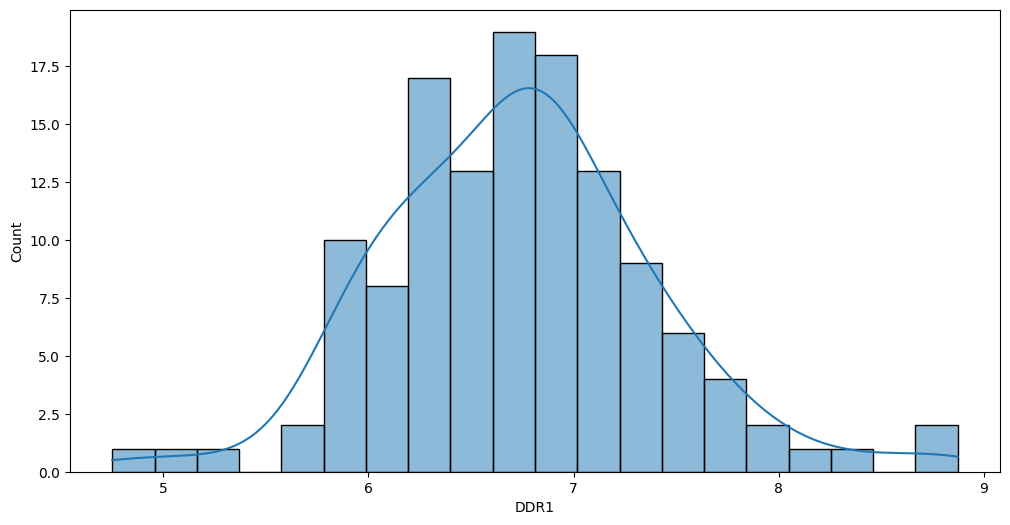

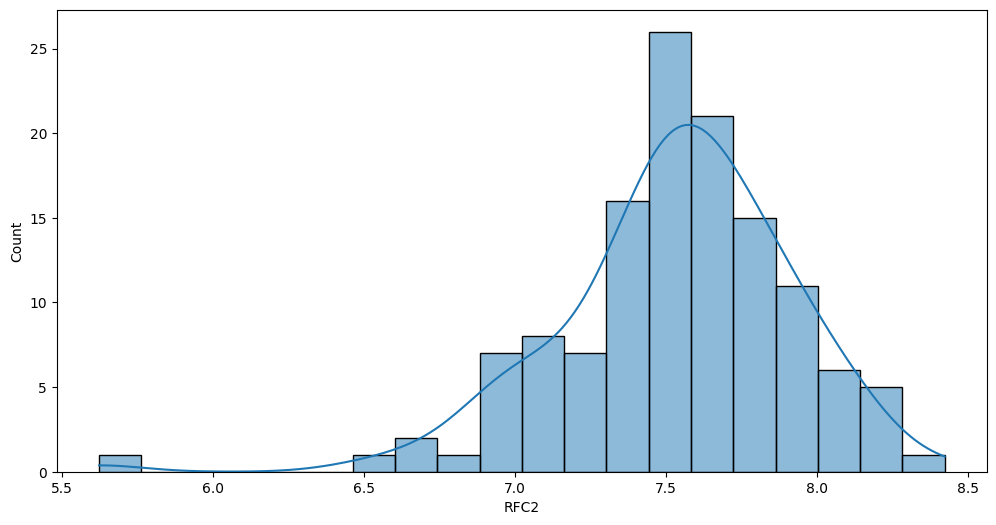

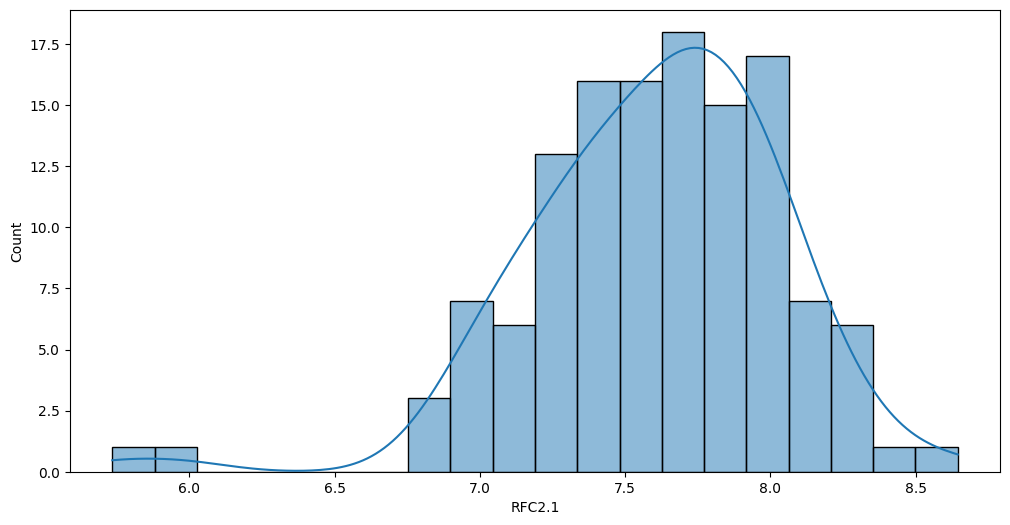

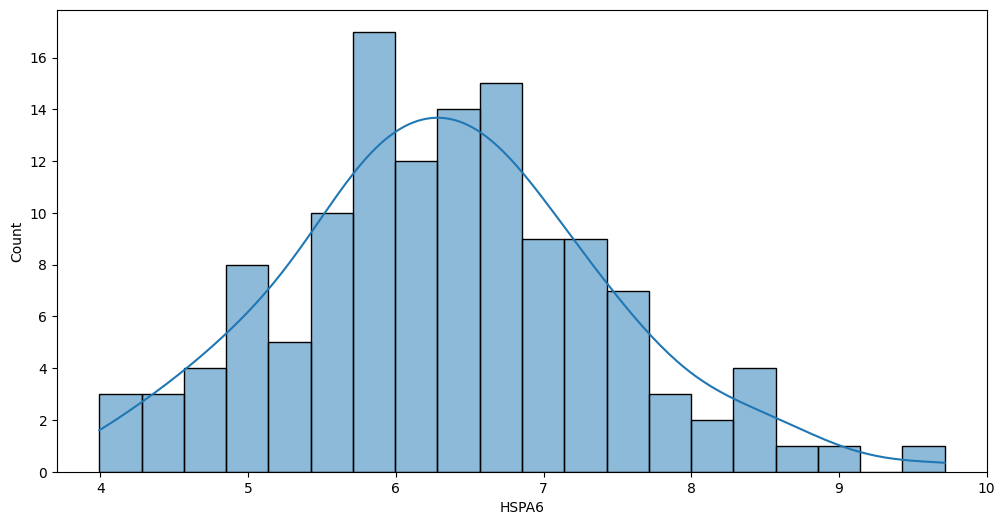

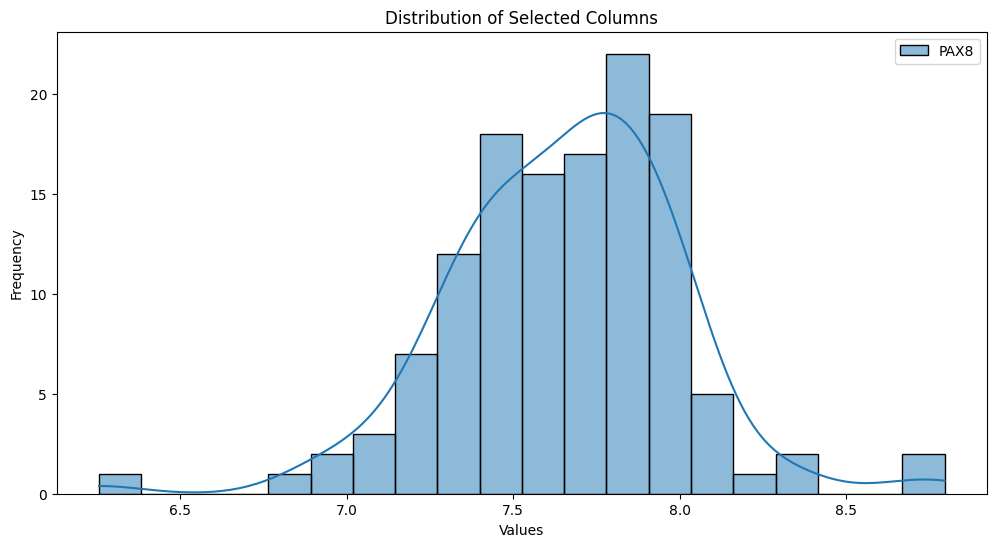

In [111]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x is your DataFrame

# Select a subset of columns for visualization
subset_cols = x_bc_train.columns[:5]  # Choose the first 10 columns for example

# Create histograms for the selected columns

for col in subset_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(x_bc_train[col], kde=True, bins=20, label=col)

plt.title('Distribution of Selected Columns')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [48]:
# Spearman correlation


In [81]:
# Pearson Correlation
person_correlations = [pearsonr(x_log_transformed[column], y) for column in x_log_transformed.columns] # <--- Calculate Pearson Correlation 

pearson_df = pd.DataFrame(person_correlations, columns=['Correlation Coefficient', 'p-value'], # <--- Generate p-values
                          index = x_log_transformed.columns).reset_index().rename(columns={'index': 'Gene_Name'}) # <--- Create Table 

pearson_df['Absolute Correlation Coefficient'] = np.abs(pearson_df['Correlation Coefficient']) # <--- Absolute Value

pearson_df_sorted = pearson_df.sort_values(by='Absolute Correlation Coefficient', 
                                    ascending = False).drop('Absolute Correlation Coefficient', axis = 1) # <--- Sort Table

pearson_df_significant = pearson_df_sorted[pearson_df_sorted['p-value'] < 0.05] # <--- Significance Filter 

pearson_df_significant # <--- Display Table

,Gene_Name,Correlation Coefficient,p-value
11440,FCGR2A.5,0.542890,2.034696e-15
19819,FCGR2A.8,0.542890,2.034696e-15
11437,FCGR2A.2,0.542890,2.034696e-15
19796,CD4,0.525905,2.092500e-14
18984,SV2A,-0.516378,7.313492e-14
...,...,...,...
2180,TXNDC9,0.145198,4.986234e-02
18867,TXNDC9.2,0.145198,4.986234e-02
448,JAK1.3,-0.145139,4.995598e-02
16224,JAK1.6,-0.145139,4.995598e-02


In [82]:
# Chi-Squared Test
chisq_features = SelectKBest(score_func=chi2, k=10)  # <--- Select 10 Features
chisq_fit = chisq_features.fit(x_log_transformed, y)  # <--- Fit Chi-Squared

chisq_scores = pd.DataFrame(chisq_fit.scores_)  # <--- Scores
chisq_pvalues = pd.DataFrame(chisq_fit.pvalues_)  # <--- p-values
chisq_labels = pd.DataFrame(x_log_transformed.columns)  # <--- Features 

chisq_df = pd.concat([chisq_labels, chisq_scores, chisq_pvalues], axis=1)
chisq_df.columns = ['Gene_Name', 'Chi-Square Statistic', 'p-value']  # <--- Create Table 
chisq_df_sorted = chisq_df.sort_values(by=['Chi-Square Statistic'], ascending=False)  # <--- Sort Table
chisq_df_significant = chisq_df_sorted[chisq_df_sorted['p-value'] < 0.05]  # <--- Significance Filter 

chisq_df_significant  # <--- Display Table

,Gene_Name,Chi-Square Statistic,p-value
21440,GABRE,48.736210,7.142530e-08
23554,HK3,47.116405,1.456983e-07
24614,EPB41L3,46.919816,1.588312e-07
4913,MTMR11,39.524735,3.927357e-06
22296,MTMR11.2,39.524735,3.927357e-06
...,...,...,...
11309,SLC8A1.22,15.528690,4.964478e-02
5443,SLC8A1.2,15.528690,4.964478e-02
9349,SLC8A1.12,15.528690,4.964478e-02
9344,SLC8A1.7,15.528690,4.964478e-02


In [83]:
# Analysis of Variance
anova_features = SelectKBest(score_func = f_classif, k = 10).fit(x_log_transformed, y) # <--- Select 10 Features

anova_scores = pd.DataFrame(anova_features.scores_, columns=['F-Statistic']) # <--- Scores
anova_pvalues = pd.DataFrame(anova_features.pvalues_, columns=['p-value']) # <--- p-values
anova_labels = pd.DataFrame(x_log_transformed.columns, columns=['Gene_Name']) # Features

anova_df = pd.concat([anova_labels, anova_scores, anova_pvalues], axis = 1) # <--- Create Table
anova_df_sorted = anova_df.sort_values('F-Statistic', ascending = False) # <--- Sort Table
anova_df_significant = anova_df_sorted[anova_df_sorted['p-value'] < 0.05] # <--- Significance Filter 

anova_df_significant # <--- Display Table

,Gene_Name,F-Statistic,p-value
21273,ARHGAP4,36.553135,1.637794e-33
18647,MAP7.3,27.887587,1.424911e-27
18645,MAP7.1,27.887587,1.424911e-27
13591,ANXA8.1,24.318363,7.830282e-25
18990,ANXA8.3,24.318363,7.830282e-25
...,...,...,...
6542,CD44.3,1.993376,4.982318e-02
3205,CLDN20,1.993152,4.985093e-02
1886,TCEANC,1.992411,4.994273e-02
10635,TCEANC.3,1.992411,4.994273e-02


In [84]:
# Complete Merged Table
merged_df = (anova_df_sorted.merge(chisq_df_sorted, on='Gene_Name', how='outer')
                             .merge(pearson_df_sorted, on='Gene_Name', how='outer'))

In [85]:
merged_df.columns = ['Gene_Name', 
                     'F-Statistic', 'p-value (ANOVA)', 
                     'Chi-Square Statistic', 'p-value (Chi-Squared Test)', 
                     'Correlation Coefficient', 'p-value (Pearson Correlation)']
merged_df.shape

(24935, 7)

In [86]:
merged_df.to_csv('/Users/keerthana/Documents/NUS Precision Med 25/5005/5005_Project/Processed Datasets/AML-Biomarker-Selection.csv', index = None)

In [87]:
# Supported Biomarkers

biomarkers_df = anova_df_sorted.merge(chisq_df_sorted, on='Gene_Name').merge(pearson_df_sorted, on='Gene_Name')

biomarkers_df.columns = ['Gene_Name', 
                         'F-Statistic', 'p-value (ANOVA)', 
                         'Chi-Square Statistic', 'p-value (Chi-Squared Test)', 
                         'Correlation Coefficient', 'p-value (Pearson Correlation)'] # <--- Create Biomarkers Table

significant_biomarkers_df = biomarkers_df[(biomarkers_df['p-value (ANOVA)'] < 0.05) 
                                          & (biomarkers_df['p-value (Chi-Squared Test)'] < 0.05) 
                                          & (biomarkers_df['p-value (Pearson Correlation)'] < 0.05)] # <-- Filter 0.05 p-value


significant_biomarkers_list = significant_biomarkers_df['Gene_Name'].values # <-- Ensembl ID for ML/AI Analysis

#significant_biomarkers_list
significant_biomarkers_df#

,Gene_Name,F-Statistic,p-value (ANOVA),Chi-Square Statistic,p-value (Chi-Squared Test),Correlation Coefficient,p-value (Pearson Correlation)
1,MAP7.3,27.887587,1.424911e-27,22.463463,0.004126,-0.273129,1.833741e-04
2,MAP7.1,27.887587,1.424911e-27,22.463463,0.004126,-0.273129,1.833741e-04
3,ANXA8.1,24.318363,7.830282e-25,23.654890,0.002618,0.158231,3.240841e-02
4,ANXA8.3,24.318363,7.830282e-25,23.654890,0.002618,0.158231,3.240841e-02
10,CD1D,20.950413,4.667302e-22,30.346789,0.000184,0.474101,1.208265e-11
...,...,...,...,...,...,...,...
2587,LOC101928893,4.403394,7.204634e-05,16.396962,0.037038,0.188900,1.043779e-02
2720,CLEC7A.6,4.305678,9.471487e-05,16.630232,0.034198,0.219085,2.885270e-03
2721,CLEC7A.10,4.305678,9.471487e-05,16.630232,0.034198,0.219085,2.885270e-03
2722,CLEC7A.14,4.305678,9.471487e-05,16.630232,0.034198,0.219085,2.885270e-03


In [88]:
len(significant_biomarkers_list)

125

In [89]:
significant_biomarkers_df.to_csv('/Users/keerthana/Documents/NUS Precision Med 25/5005/5005_Project/Processed Datasets/AML-significant_biomarkers.csv', index = None)

In [57]:
significant_biomarkers_list
# Add 'ID_REF' and 'SUBTYPES' to the list of columns to keep
columns_to_keep = ['ID_REF', 'SUBTYPES'] + significant_biomarkers_list

# Select only the columns/features of interest
filtered_df = df[columns_to_keep]

# First, set the index to gene names if it's not already
#significant_biomarkers_df = significant_biomarkers_df.set_index('Gene_Name')  # Replace 'Gene_Name' with your actual gene name column

# Then, sort the DataFrame by subtypes if not already sorted
# This step assumes you have a way to map each sample to its subtype, possibly in a separate DataFrame or column
#sorted_columns = significant_biomarkers_df.columns.to_series().sort_values(by=['SUBTYPES', 'ID_REF'])
#significant_biomarkers_df_sorted = significant_biomarkers_df[sorted_columns]

In [116]:
# ML/AI Analysis
y = df['SUBTYPES'] # <--- Target (Case/Control)
x_biomarker = x_log_transformed[significant_biomarkers_list] # <--- Features (Significant Biomarkers)

x_biomarker_train, x_biomarker_test, y_biomarker_train, y_biomarker_test = train_test_split(x_biomarker, y, test_size = test_size, random_state = random_state) # <--  Test/Train


x_biomarker_train.head()

,MAP7.3,MAP7.1,ANXA8.1,ANXA8.3,CD1D,SAMHD1.3,SAMHD1,SAMHD1.6,ITM2A.1,ITM2A.3,...,EGFEM1P,CT45A1,PAWR.1,PAWR.3,LILRA3,LOC101928893,CLEC7A.6,CLEC7A.10,CLEC7A.14,CLEC7A.2
171,8.289489,8.289489,6.688106,6.688106,9.018514,9.010181,9.010181,9.010181,7.164488,7.164488,...,4.789157,5.535758,5.188503,5.188503,7.677678,4.507557,6.411161,6.411161,6.411161,6.411161
154,9.024493,9.024493,6.499486,6.499486,6.912444,6.902341,6.902341,6.902341,9.667214,9.667214,...,5.639422,3.178054,6.644180,6.644180,6.089045,3.671225,4.750136,4.750136,4.750136,4.750136
85,8.223572,8.223572,6.078279,6.078279,4.719539,7.911250,7.911250,7.911250,7.361741,7.361741,...,4.902746,4.551228,6.257768,6.257768,3.496406,2.413307,4.953050,4.953050,4.953050,4.953050
166,7.508465,7.508465,5.685423,5.685423,7.589062,6.854884,6.854884,6.854884,10.401948,10.401948,...,5.848509,3.259480,4.910193,4.910193,5.073518,1.351475,5.943113,5.943113,5.943113,5.943113
26,8.412402,8.412402,6.833656,6.833656,7.433606,7.989294,7.989294,7.989294,10.791933,10.791933,...,4.489066,5.240704,5.238198,5.238198,6.253149,5.655685,5.979999,5.979999,5.979999,5.979999


In [117]:
# Random Forest Classifier (with Hyperparameter Tuning)
rf = RandomForestClassifier(random_state = 42) # <--- Initialize RF 
rf.fit(x_biomarker_train, y_biomarker_train) # <--- Fit RF

RandomForestClassifier(random_state=42)

In [118]:
rf_parameter_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

kfold = KFold(n_splits = 2 , shuffle = True, random_state = random_state) # <--- KFold

rf_best = GridSearchCV(
    rf, param_grid = rf_parameter_grid, cv = kfold,
    scoring = 'accuracy', n_jobs = -1, verbose = 0
) # <--- Hyperparameter Tuning 

rf_best.fit(x_biomarker_train, y_biomarker_train) # <--- Fit GridSearchCV
rf_best = rf_best.best_estimator_ # <--- Assign Best Estimator 
rf_best

RandomForestClassifier(max_depth=10, random_state=42)

In [119]:
y_predict = rf_best.predict(x_biomarker_test)  # <--- Predict Target
rf_accuracy = accuracy_score(y_biomarker_test, y_predict)  # <--- Calculate Accuracy

y_probs = rf_best.predict_proba(x_biomarker_test)
y_probs = y_probs[:, 1]  # <--- Predict Positives Classes

rf_F1 = f1_score(y_biomarker_test, y_predict, average='weighted')  # <--- Weigthed-Average F1 Score

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Convert y_predict to one-hot encoding
lb = LabelBinarizer()
y_one_hot = lb.fit_transform(y_predict)

# Compute ROC AUC score for each class
roc_auc_scores = []
for i in range(y_one_hot.shape[1]):
    roc_auc_scores.append(roc_auc_score(y_one_hot[:, i], y_probs))
# Average the ROC AUC scores across all classes
avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)


print('Accuracy: ', rf_accuracy)
print("Average ROC AUC Score:", avg_roc_auc)
print('Weighted-Average F1 Score: ', rf_F1)

Accuracy:  0.5454545454545454
Average ROC AUC Score: 0.40246525142358475
Weighted-Average F1 Score:  0.5300002125037188


In [120]:
# Support Vector Machine (with Hyperparameter Tuning)
svmc = SVC(kernel = 'linear', probability = True) # <--- Initialize SVM
svmc.fit(x_biomarker_train, y_biomarker_train) # <--- Fit SVM

svmc_parameter_grid = {
    "kernel": [ 'linear','rbf'],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'C': [0.01, 0.1, 1, 10, 50, 100, 500, 1000, 5000, 10000]
} # <--- Generate Parameter Grid

svmc_best = GridSearchCV(
    svmc, param_grid = svmc_parameter_grid, cv = kfold, 
    scoring = 'accuracy', n_jobs = -1, verbose = 0
) # <--- Hyperparameter Tuning 

svmc_best.fit(x_biomarker_train, y_biomarker_train) # <--- Fit GridSearchCV
# Get the best estimator
best_svmc_estimator = svmc_best.best_estimator_

svmc_best = svmc_best.best_estimator_ # <--- Assign Best Estimator 
svmc_best

SVC(C=0.01, gamma=0.001, kernel='linear', probability=True)

In [121]:
y_predict = svmc_best.predict(x_biomarker_test) # <--- Predict Target
svmc_accuracy = accuracy_score(y_biomarker_test, y_predict) # <--- Calculate Accuracy

y_probs = svmc_best.predict_proba(x_biomarker_test)
y_probs = y_probs[:, 1] # <--- Predict Positives Classes
# Convert y_predict to one-hot encoding
lb = LabelBinarizer()
y_one_hot = lb.fit_transform(y_predict)
# Compute ROC AUC score for each class
svm_roc_auc_scores = []
for i in range(y_one_hot.shape[1]):
    roc_auc_scores.append(roc_auc_score(y_one_hot[:, i], y_probs))
# Average the ROC AUC scores across all classes
svmc_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)

svmc_F1 = f1_score(y_biomarker_test, y_predict, average = 'weighted') # <--- Weigthed-Average F1 Score

print('Accuracy: ', svmc_accuracy)
print("Average ROC AUC Score:", svmc_avg_roc_auc)
print('Weighted-Average F1 Score: ', svmc_F1)

Accuracy:  0.5818181818181818
Average ROC AUC Score: 0.4058045437659776
Weighted-Average F1 Score:  0.5842274050140704


In [122]:
# k-Nearest Neighbors (with Hyperparameter Tuning)
knn_classifier = sklearn.neighbors.KNeighborsClassifier() # <--- Initialize kNN
knn_model = knn_classifier.fit(x_biomarker_train, y_biomarker_train)  # <--- Fit kNN
n_samples = len(x_biomarker_train) 
max_neighbors = min(n_samples - 1, 30) 
leaf_size = list(range(1, 50)) 
n_neighbors = list(range(1, max_neighbors + 1)) # <--- Parameters from Samples, Standard Use
p = [1, 2] # <--- Manhattan, Euclidean Distance Metrics

knn_hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p = p) # <--- Hyperparametrs Dictionary
knn_best = GridSearchCV(knn_model, knn_hyperparameters, cv = kfold) # <--- Initialize GridSearchCV
knn_best = knn_best.fit(x_biomarker_train, y_biomarker_train) # <--- Fit GridSearchCV
knn_best

#jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

GridSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2]})

In [123]:
y_predict = knn_best.predict(x_biomarker_test) # <--- Predict Target
knn_accuracy = accuracy_score(y_biomarker_test, y_predict) # <--- Calculate Accuracy

y_probs = knn_best.predict_proba(x_biomarker_test)
y_probs = y_probs[:, 1] # <--- Predict Positives Classes

# Convert y_predict to one-hot encoding
lb = LabelBinarizer()
y_one_hot = lb.fit_transform(y_predict)
# Compute ROC AUC score for each class
knn_roc_auc_scores = []
for i in range(y_one_hot.shape[1]):
    knn_roc_auc_scores.append(roc_auc_score(y_one_hot[:, i], y_probs))
# Average the ROC AUC scores across all classes
knn_avg_roc_auc = sum(knn_roc_auc_scores) / len(roc_auc_scores)


knn_F1 = f1_score(y_biomarker_test, y_predict, average = 'weighted') # <--- Weigthed-Average F1 Score

print('Accuracy: ', knn_accuracy)
print('ROC-AUC: ', knn_avg_roc_auc)
print('Weighted-Average F1 Score: ', knn_F1)

Accuracy:  0.5818181818181818
ROC-AUC:  0.20694368060162024
Weighted-Average F1 Score:  0.5836017316017317


In [124]:
# Soft Voting Classifier
classifiers = [
    ('rf', rf_best),
    ('svmc', svmc_best),
#     ('xgb', xgb_best),
    ('knn', knn_best)
] # <-- Merge ML/AI Methods

hard_voting_classifier = sklearn.ensemble.VotingClassifier(classifiers, voting = 'hard') # <--- Initialize hard Voting
hard_voting_classifier.fit(x_biomarker_train, y_biomarker_train) # <--- Fit hard Voting
hard_voting_classifier

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     random_state=42)),
                             ('svmc',
                              SVC(C=0.01, gamma=0.001, kernel='linear',
                                  probability=True)),
                             ('knn',
                              GridSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
                                           estimator=KNeighborsClassifier(),
                                           param_grid={'leaf_size': [1, 2, 3, 4,
                                                                     5, 6, 7, 8,
                                                                     9, 10, 11,
                                                                     12, 13, 14,
                                                                     15, 16, 17,
                                                                     18, 19, 20,
                                                                     21, 22, 23,
                                                                     24, 25, 26,
                                                                     27, 28, 29,
                                                                     30, ...],
                                                       'n_neighbors': [1, 2, 3,
                                                                       4, 5, 6,
                                                                       7, 8, 9,
                                                                       10, 11,
                                                                       12, 13,
                                                                       14, 15,
                                                                       16, 17,
                                                                       18, 19,
                                                                       20, 21,
                                                                       22, 23,
                                                                       24, 25,
                                                                       26, 27,
                                                                       28, 29,
                                                                       30],
                                                       'p': [1, 2]}))])

In [125]:
y_predict = hard_voting_classifier.predict(x_biomarker_test) # <--- Predict Target
hard_voting_classifier_accuracy = accuracy_score(y_biomarker_test, y_predict) # <--- Calculate Accuracy
hard_voting_classifier_accuracy

0.6

Model Accuracy: 0.6


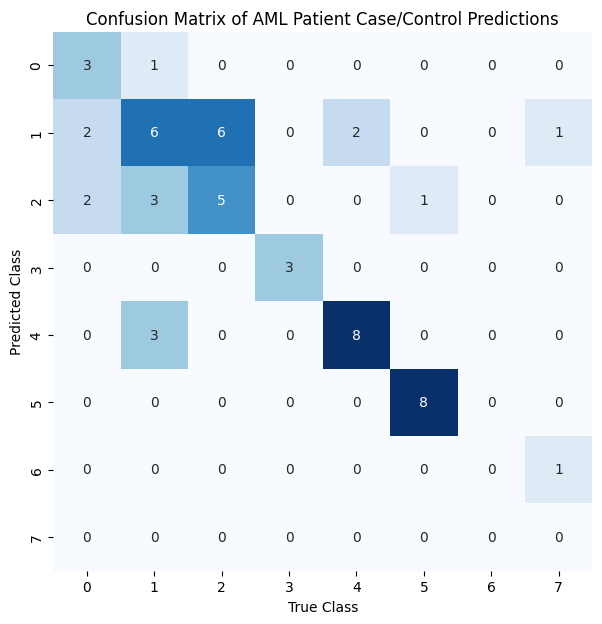

In [127]:
# Figure). Confusion Matrix
figure_size = (7, 7)
figure = plt.figure(figsize = figure_size) # <--- Figure Size

cm = confusion_matrix(y_biomarker_test, y_predict) # <--- Generate Confusion Matrix
ax = sns.heatmap(cm.T, square = True, annot = True, fmt = 'd', cbar = False, cmap='Blues')

figure_title = 'Confusion Matrix of AML Patient Case/Control Predictions'
plt.title(figure_title)  # <--- Figure Title
x_label = 'True Class'
plt.xlabel(x_label) # <--- Horizontal Axis Title
y_label = 'Predicted Class'
plt.ylabel(y_label) # <--- Vertical Axis Title

print(f'Model Accuracy: {hard_voting_classifier_accuracy}')
plt.show() # <--- Display Figure

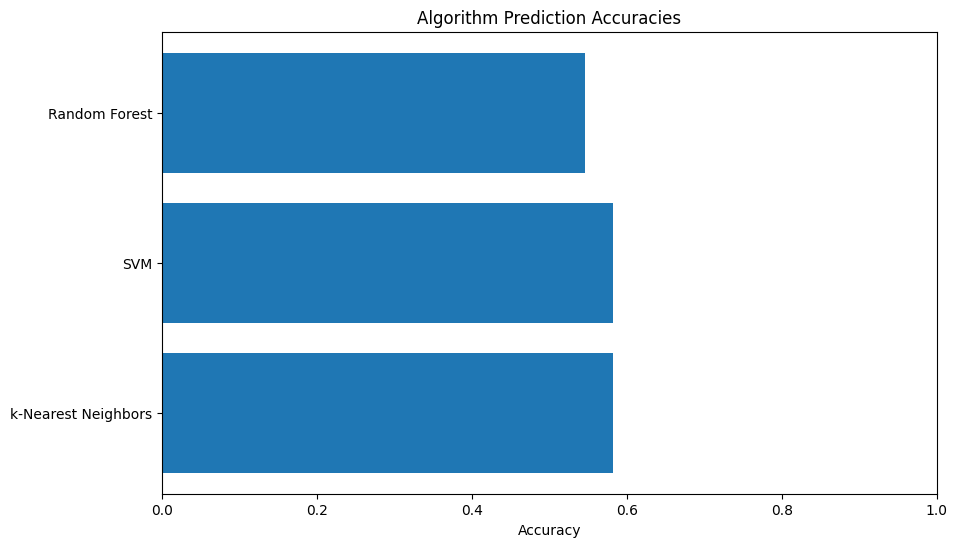

In [128]:
# Figure). Algorithm Accuracies

def plot_algorithm_accuracies(accuracies, algorithm_names, title = 'Algorithm Prediction Accuracies'):
    plt.figure(figsize=(10, 6))
    plt.barh(algorithm_names, accuracies, align = 'center')
    plt.xlabel('Accuracy')
    plt.xlim(0, 1)
    plt.title(title)
    plt.show()

accuracies = [knn_accuracy, 
#               xgb_accuracy, 
              svmc_accuracy, 
              rf_accuracy] # <--- Accuracy Variables
algorithms = ['k-Nearest Neighbors', 'SVM', 
#               'XGBoost', 
              'Random Forest'] # <--- Algorithms 

plot_algorithm_accuracies(accuracies, algorithms) # <--- Display Figure

In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load the data
data = working_dataset

# Preprocessing
X = data.drop(columns=['ID_REF', 'AGE', 'SUBTYPES', 'GENDER'])
y = data[['AGE', 'SUBTYPES', 'GENDER']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode categorical variables
encoder = LabelEncoder()
y['SUBTYPES'] = encoder.fit_transform(y['SUBTYPES'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


# Modify the model's output layer to have three neurons
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='linear')  # Use 'linear' activation for multi-output regression
])

# Compile the model with appropriate loss and metrics
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])  # Use mean squared error for regression

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)




ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Test MAE:", mae)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Define LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(32, activation='relu'),
    Dense(3, activation='linear')  # Output layer with 3 neurons for AGE, SUBTYPES, and GENDER
])

# Compile the model
lstm_model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

# Train the model
lstm_model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, mae = lstm_model.evaluate(X_test, y_test)
print("Test MAE for LSTM:", mae)